In [1]:
import qiskit
qiskit.__qiskit_version__

/Users/caitaozhan/opt/anaconda3/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


{'qiskit-terra': '0.18.3', 'qiskit-aer': '0.9.1', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.18.1', 'qiskit-aqua': '0.9.5', 'qiskit': '0.32.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [2]:
import numpy as np
import time
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

# Getting started with Qiskit (The hello world of quantum computing)

In [80]:
# Old qiskit style

circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.measure([0], [0])

simulator = Aer.get_backend('qasm_simulator')
shots = 100_000
start = time.time()
job = execute(circuit, simulator, shots=shots)
result = job.result()
elapse = time.time() - start
counts = result.get_counts(circuit)

print(f'Total count for 0 and 1 are: {counts}')
print(f'Time per single simulation is {elapse/shots*1e6:.2f} microseconds')
circuit.draw()

Total count for 0 and 1 are: {'0': 49963, '1': 50037}
Time per single simulation is 1.23 microseconds


┌───┐┌─┐
q_0: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

## 1 Creating Superposition using H Gate

In [62]:
circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.measure([0], [0])

simulator = QasmSimulator()
shots = 100_000
compiled_circuit = transpile(circuit, simulator)
start = time.time()
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
elapse = time.time() - start
counts = result.get_counts(compiled_circuit)

print(f'Total count for 0 and 1 are: {counts}')
print(f'Time per single simulation is {elapse/shots*1e6:.2f} microseconds')
circuit.draw()

Total count for 0 and 1 are: {'0': 49877, '1': 50123}
Time per single simulation is 1.12 microseconds


┌───┐┌─┐
q_0: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

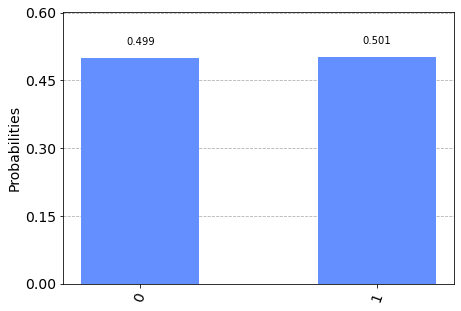

In [63]:
plot_histogram(counts)

In [9]:
circuit = QuantumCircuit(3, 3)
circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.measure([0, 1, 2], [0, 1, 2])

simulator = QasmSimulator()
shots = 100_000
compiled_circuit = transpile(circuit, simulator)
start = time.time()
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
elapse = time.time() - start
counts = result.get_counts(compiled_circuit)

print(f'Total count for 0 and 1 are: {counts}')
print(f'Time per single simulation is {elapse/shots*1e6:.2f} microseconds')
circuit.draw()

Total count for 0 and 1 are: {'000': 12633, '010': 12409, '001': 12663, '100': 12474, '110': 12557, '101': 12450, '111': 12525, '011': 12289}
Time per single simulation is 2.00 microseconds


┌───┐┌─┐      
q_0: ┤ H ├┤M├──────
     ├───┤└╥┘┌─┐   
q_1: ┤ H ├─╫─┤M├───
     ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─╫──╫─┤M├
     └───┘ ║  ║ └╥┘
c: 3/══════╩══╩══╩═
           0  1  2

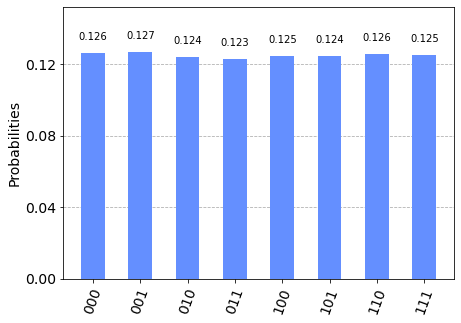

In [10]:
plot_histogram(counts)

## 2 Creating Bell Pair Entanglement using H Gate and CNOT Gate

https://qiskit.org/documentation/getting_started.html

In [72]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])

simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator)
shots = 100_000
start = time.time()
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
elapse = time.time() - start
counts = result.get_counts(compiled_circuit)

print(f'Total count for 00 and 11 are: {counts}')
print(f'Time per single simulation is {elapse/shots*1e6:.2f} microseconds')
circuit.draw()

Total count for 00 and 11 are: {'11': 49790, '00': 50210}
Time per single simulation is 1.64 microseconds


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

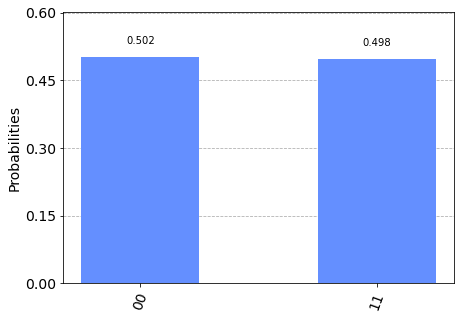

In [73]:
plot_histogram(counts)

## 3 Creating GHZ Entanglement using H Gate and Two CNOT Gates
https://qiskit.org/documentation/apidoc/circuit.html

In [74]:
circuit = QuantumCircuit(3, 3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.measure([0, 1, 2], [0, 1, 2])

simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator)
shots = 100_000
start = time.time()
job = simulator.run(compiled_circuit, shots = shots)
result = job.result()
elapse = time.time() - start
counts = result.get_counts(compiled_circuit)

print(f'Total count for 000 and 111 are: {counts}')
print(f'Time per single simulation is {elapse/shots*1e6:.2f} microseconds')
circuit.draw()

Total count for 000 and 111 are: {'111': 49903, '000': 50097}
Time per single simulation is 2.18 microseconds


┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

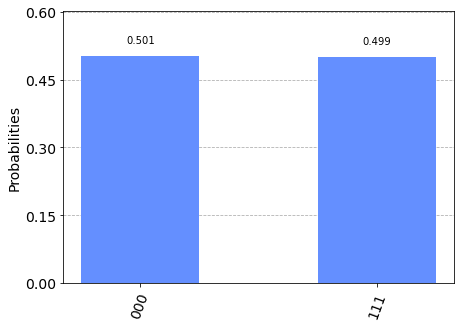

In [75]:
plot_histogram(counts)